<a href="https://colab.research.google.com/github/sajivjose174/Project/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Problem:





The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [ ]:
!curl -o aerofit_treadmill.csv "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7279  100  7279    0     0  41339      0 --:--:-- --:--:-- --:--:-- 41594


In [ ]:
df_aerofit = pd.read_csv('aerofit_treadmill.csv')

In [ ]:
df_aerofit.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


#Basic Data Analysis

In [ ]:
#shape of the given data:
df_aerofit.shape

(180, 9)

In [ ]:
#Checking data types of all the attributes
df_aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
#statistical summary
df_aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
#null values check##
df_aerofit.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


#Exploratory Data Analysis

In [ ]:
# Unique Values
for i in df_aerofit.columns:
  print (f"{i}:", df_aerofit[i].nunique())

Product: 3
Age: 32
Gender: 2
Education: 8
MaritalStatus: 2
Usage: 6
Fitness: 5
Income: 62
Miles: 37


In [ ]:
# Value counts
for i in df_aerofit.columns:
  print (f"{i}:", df_aerofit[i].value_counts())

Product: Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64
Age: Age
25    25
23    18
24    12
26    12
28     9
33     8
35     8
22     7
30     7
27     7
38     7
21     7
31     6
34     6
29     6
20     5
40     5
19     4
32     4
37     2
45     2
48     2
47     2
18     1
41     1
39     1
36     1
43     1
46     1
44     1
50     1
42     1
Name: count, dtype: int64
Gender: Gender
Male      104
Female     76
Name: count, dtype: int64
Education: Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64
MaritalStatus: MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64
Usage: Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64
Fitness: Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64
Income: Income
45480     14
52302      9
53439      8
54576      8
46617      8
          ..
85906      1
99601      1
103336     1
95866      1
95508 

In [ ]:
#overview table##
# A table to gain possible Business Insight (b/w the columns their max,min,count and mean values):##
df_aerofit.groupby('Product')[["Age", "Usage", "Fitness", "Income", "Miles", "Education"]].agg(['max', 'min', 'mean', 'size'])

Age                 Usage                    Fitness      ...  \
        max min   mean size   max min      mean size     max min  ...   
Product                                                           ...   
KP281    50  18  28.55   80     5   2  3.087500   80       5   1  ...   
KP481    48  19  28.90   60     5   2  3.066667   60       4   1  ...   
KP781    48  22  29.10   40     7   3  4.775000   40       5   3  ...   

            Income      Miles                      Education                 \
              mean size   max min        mean size       max min       mean   
Product                                                                       
KP281    46418.025   80   188  38   82.787500   80        18  12  15.037500   
KP481    48973.650   60   212  21   87.933333   60        18  12  15.116667   
KP781    75441.575   40   360  80  166.900000   40        21  14  17.325000   

              
        size  
Product       
KP281     80  
KP481     60  
KP781     40  

[3 rows x 24 columns]

#Graphical Analysis:

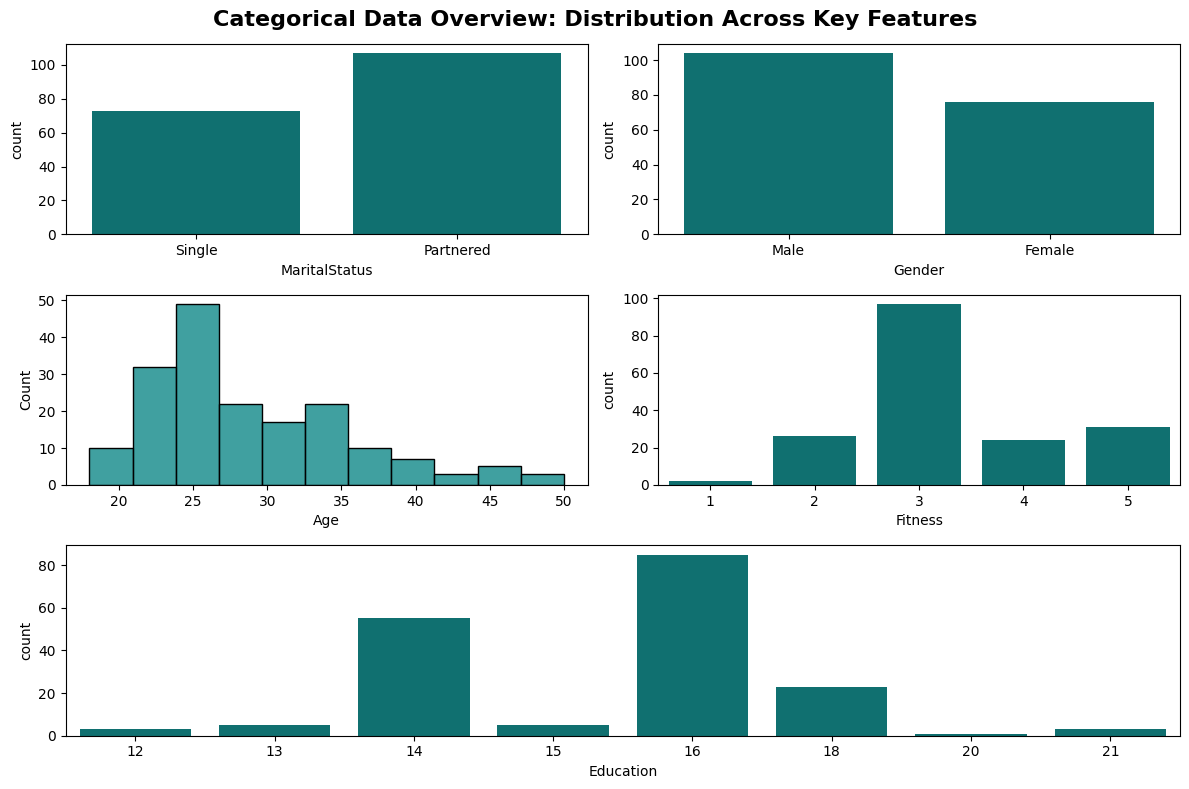

In [ ]:
#Categorical Data Overview: Distribution Across Key Features (covers all the needed barplots,histogram from the dataset):

plt.figure(figsize=(12,8))
plt.subplot(3,2,1)
sns.countplot(df_aerofit,x=df_aerofit['MaritalStatus'],color='Teal')

plt.subplot(3,2,2)
sns.countplot(df_aerofit,x=df_aerofit['Gender'],color='Teal')

plt.subplot(3,2,3)
sns.histplot(df_aerofit,x=df_aerofit['Age'],color='Teal')


plt.subplot(3,2,4)
sns.countplot(df_aerofit,x=df_aerofit['Fitness'],color='Teal')


plt.subplot(3,2,(5,6))
sns.countplot(df_aerofit,x=df_aerofit['Education'],color='Teal')

plt.suptitle("Categorical Data Overview: Distribution Across Key Features", fontsize=16, fontweight='bold')
plt.tight_layout()


<Axes: title={'center': 'Product Purchases by Gender'}, xlabel='Product', ylabel='count'>

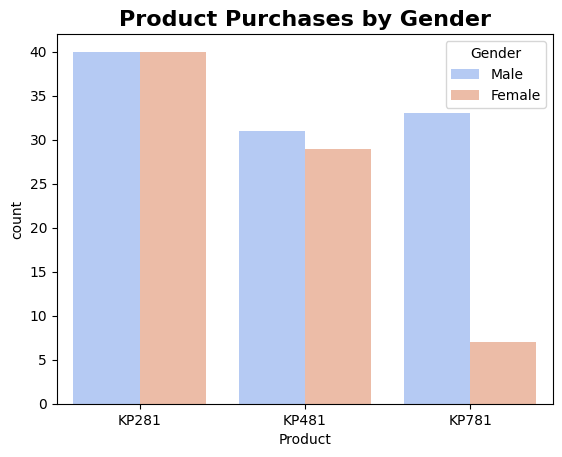

In [ ]:
#How Product Purchases Vary by Gender: Grouped Bar chart:
plt.title("Product Purchases by Gender", fontsize=16, fontweight='bold')
sns.countplot(data=df_aerofit, x="Product", hue="Gender", palette="coolwarm")

<Axes: title={'center': 'Income - Age w.r.t product Correlation'}, xlabel='Age', ylabel='Income'>

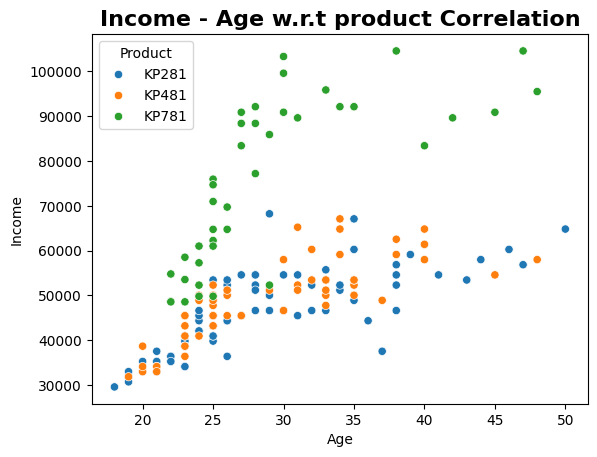

In [ ]:
#scatterplot: Income - Age w.r.t product Correlation (more focus)
plt.title("Income - Age w.r.t product Correlation", fontsize=16, fontweight='bold')
sns.scatterplot(data=df_aerofit,x='Age',y='Income',hue='Product')

Text(0.5, 1.02, 'Relationship Between Age, Usage, Fitness, and Income Across Aerofit Products')

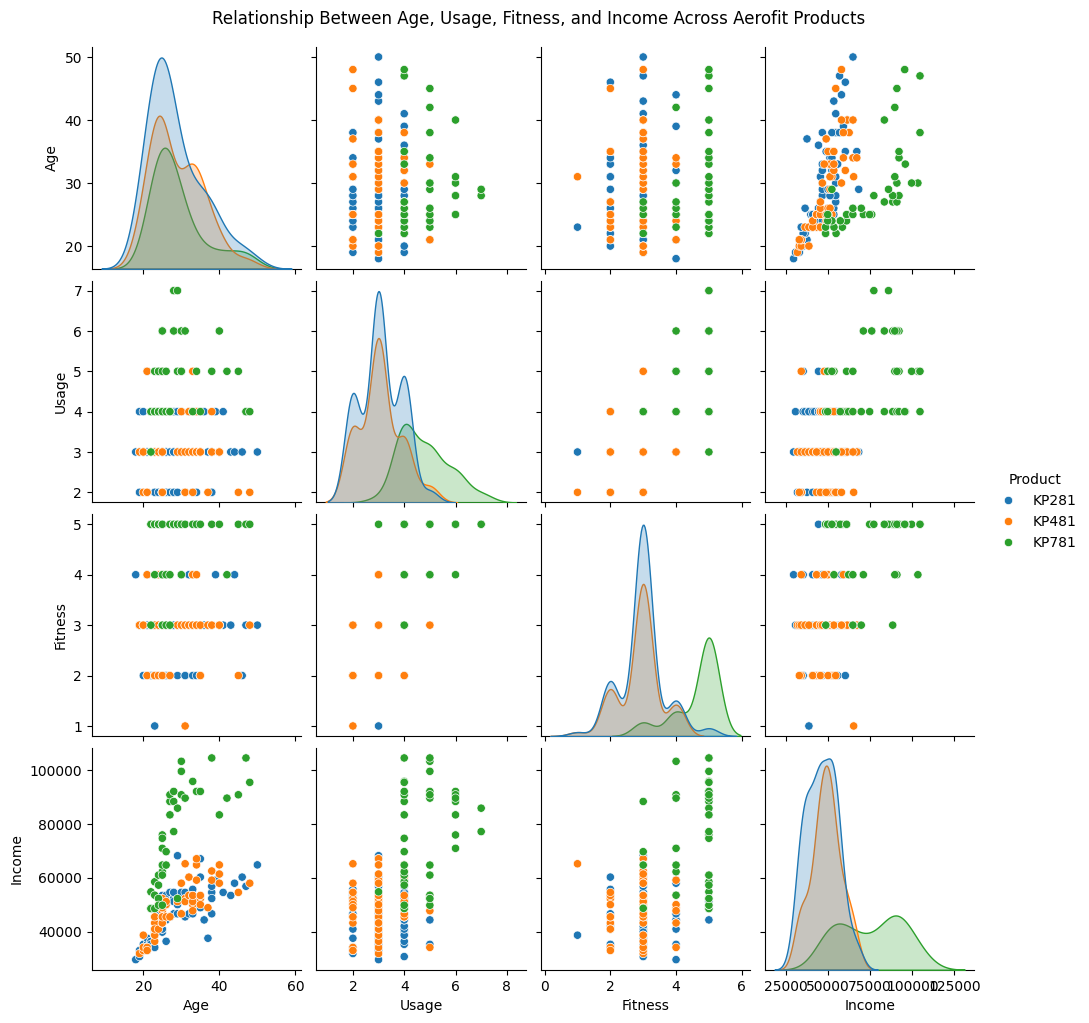

In [ ]:
#Pairplot : Overall Dataset (Seperated by Products)

pairplot=sns.pairplot(data=df_aerofit,hue="Product",vars=["Age", "Usage", "Fitness", "Income"], diag_kind="kde")
pairplot.fig.suptitle("Relationship Between Age, Usage, Fitness, and Income Across Aerofit Products",y=1.02)

Text(0.5, 1.02, 'Relationship Between Age, Usage, Fitness, and Income Across Genders')

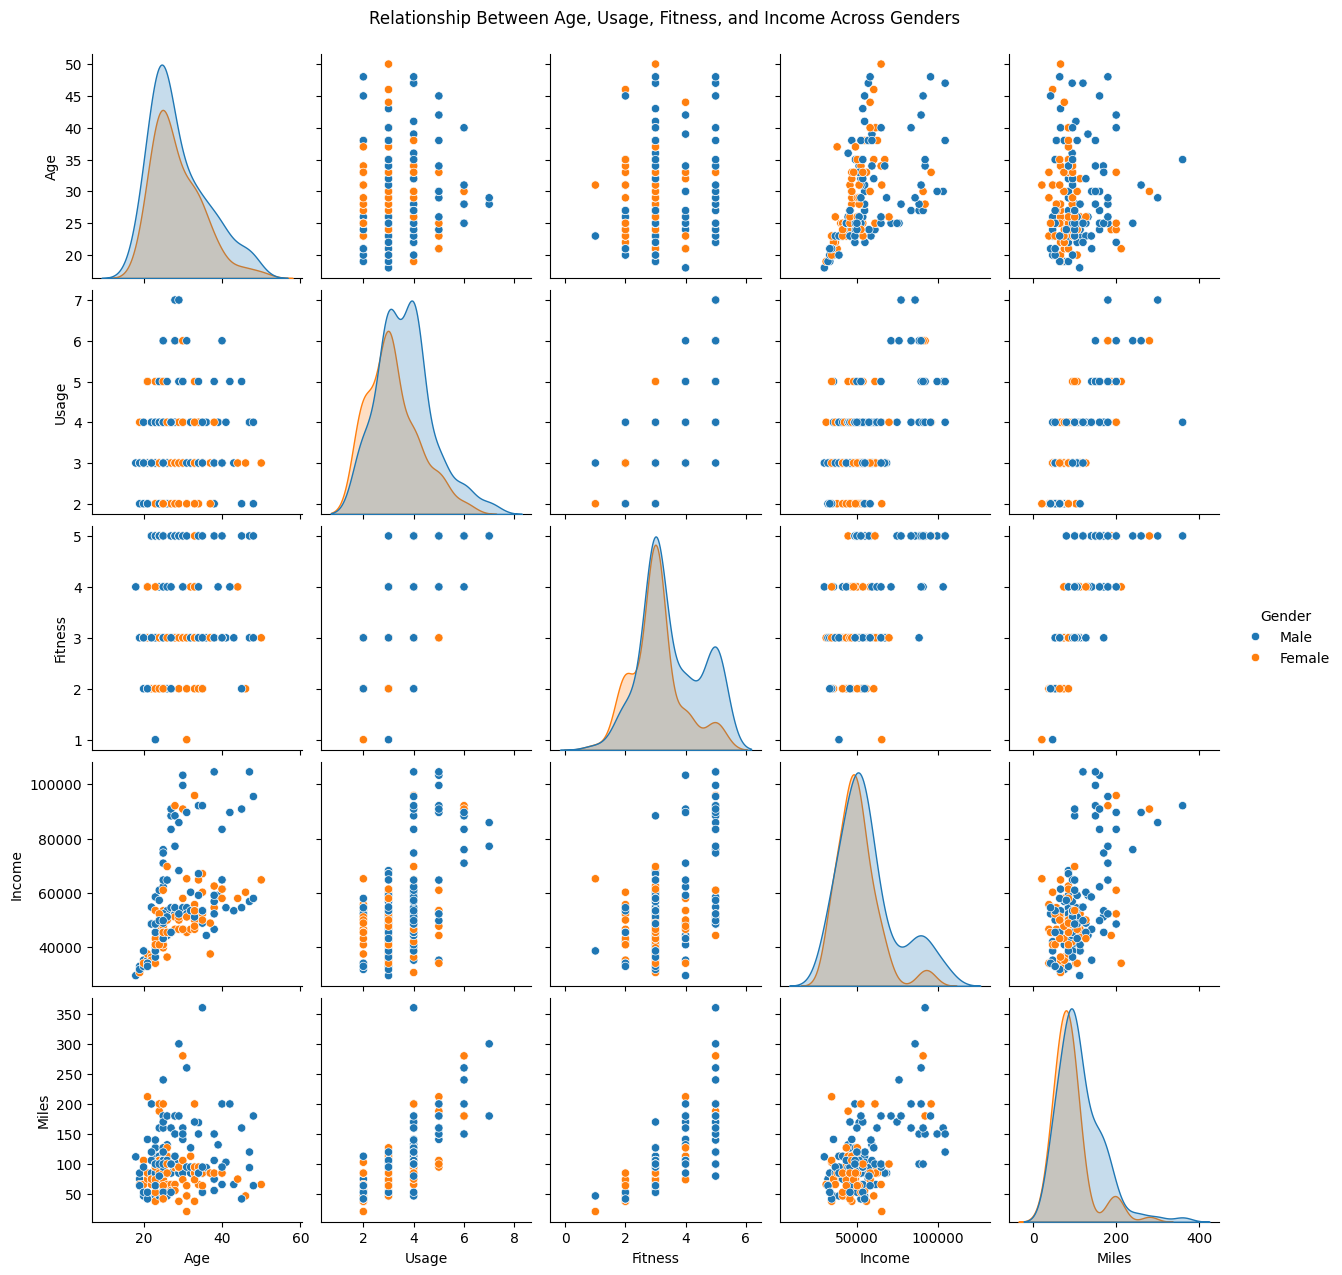

In [ ]:
#Pairplot : Overall Dataset (Seperated by Gender) : (Extra to find the Gender bias)
pairplot=sns.pairplot(data=df_aerofit,hue="Gender",vars=["Age", "Usage", "Fitness", "Income",'Miles'], diag_kind="kde")
pairplot.fig.suptitle("Relationship Between Age, Usage, Fitness, and Income Across Genders",y=1.02)

<Axes: title={'center': 'Correlation Heatmap of Age, Usage, Fitness, Income, Miles, and Education'}>

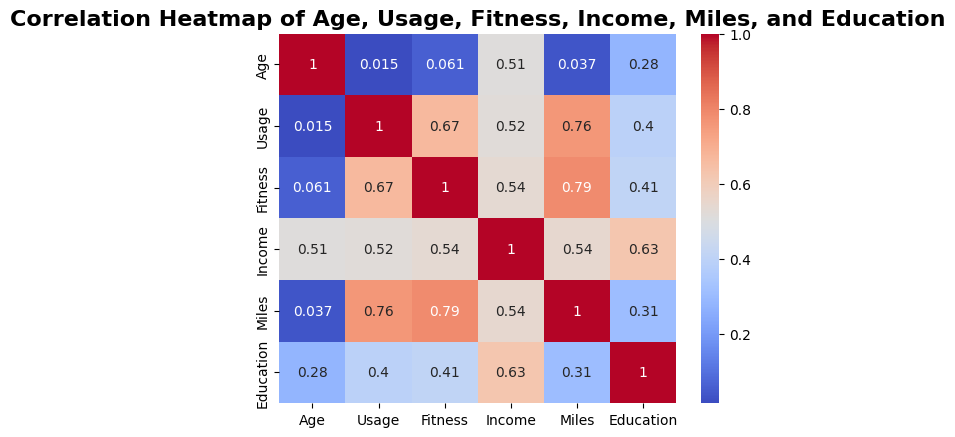

In [ ]:
#"Correlation Heatmap of Age, Usage, Fitness, Income, Miles, and Education"
plt.title("Correlation Heatmap of Age, Usage, Fitness, Income, Miles, and Education", fontsize=16, fontweight='bold')
sns.heatmap(df_aerofit[["Age", "Usage", "Fitness", "Income", "Miles",'Education']].corr(), annot=True, cmap="coolwarm")

<Axes: title={'center': 'Income Variation Across Aerofit Products, Split by Gender'}, xlabel='Product', ylabel='Income'>

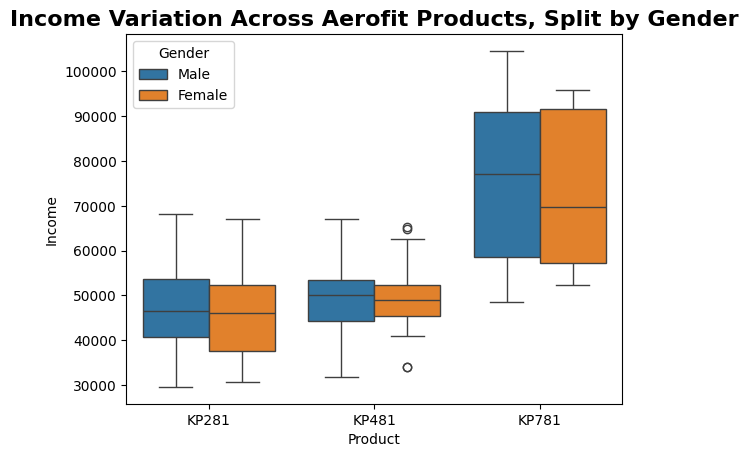

In [ ]:
#outlier checks:
#Box plot on Income vs Product:
plt.title("Income Variation Across Aerofit Products, Split by Gender", fontsize=16, fontweight='bold')
sns.boxplot(df_aerofit,x='Product',y='Income',hue='Gender')

In [ ]:
data_kp481=df_aerofit.loc[(df_aerofit['Product']=='KP481')&(df_aerofit['Gender']=='Female')]
data_kp481.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,29.103448,15.206897,3.137931,2.862069,49336.448276,87.344828
std,5.802369,1.292266,0.915117,0.693034,7984.486277,33.456022
min,20.000000,13.000000,2.000000,1.000000,34110.000000,21.000000
25%,25.000000,14.000000,3.000000,3.000000,45480.000000,74.000000
50%,29.000000,16.000000,3.000000,3.000000,48891.000000,85.000000
75%,33.000000,16.000000,4.000000,3.000000,52302.000000,95.000000
max,40.000000,18.000000,5.000000,4.000000,65220.000000,212.000000


## Outlier Detection:

<Axes: title={'center': 'Outlier boxplot for prodcut KP481'}, xlabel='Product', ylabel='Income'>

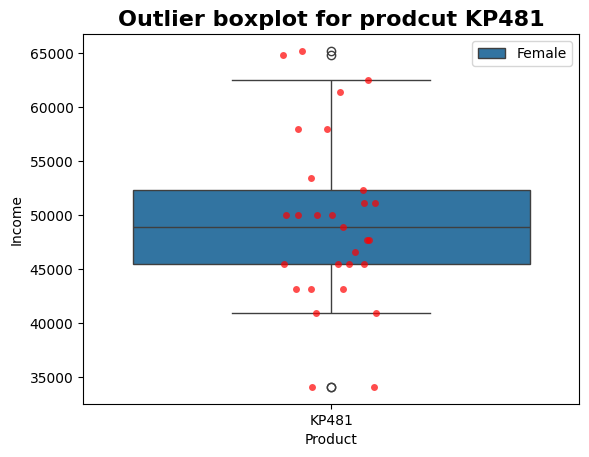

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:

plt.title("Outlier boxplot for prodcut KP481", fontsize=16, fontweight='bold')
sns.boxplot(data_kp481,x='Product',y='Income',hue='Gender')
sns.stripplot(data=data_kp481, x='Product', y='Income',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
#upper limit

In [ ]:
Q1_i=np.percentile(data_kp481['Income'],25)
Q1_i

np.float64(45480.0)

In [ ]:
Q3_i=np.percentile(data_kp481['Income'],75)
Q3_i

np.float64(52302.0)

In [ ]:
Q2_i=np.percentile(data_kp481['Income'],50)
Q2_i

np.float64(48891.0)

In [ ]:
Iqr_income=Q3_i-Q1_i
Iqr_income

np.float64(6822.0)

In [ ]:
upper_limit_income=Q3_i+(1.5*Iqr_income)
upper_limit_income

np.float64(62535.0)

In [ ]:
outlier_income=data_kp481[data_kp481['Income']>upper_limit_income]
len(outlier_income)

2

In [ ]:
#outliers in table format:(detected)

outlier_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
117,KP481,31,Female,18,Single,2,1,65220,21
125,KP481,34,Female,16,Partnered,4,3,64809,95


In [ ]:
#lower limit

In [ ]:
Q1_i

np.float64(45480.0)

In [ ]:
lower_limit_income=Q1_i-(1.5*Iqr_income)
lower_limit_income

np.float64(35247.0)

In [ ]:
outlier_income=data_kp481[data_kp481['Income']<lower_limit_income]
len(outlier_income)

2

In [ ]:
#outliers in table format:(detected)
outlier_income

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
82,KP481,20,Female,14,Partnered,3,3,34110,106
84,KP481,21,Female,14,Partnered,5,4,34110,212


<Axes: title={'center': 'Variation in Age Across Products, Split by Gender'}, xlabel='Product', ylabel='Age'>

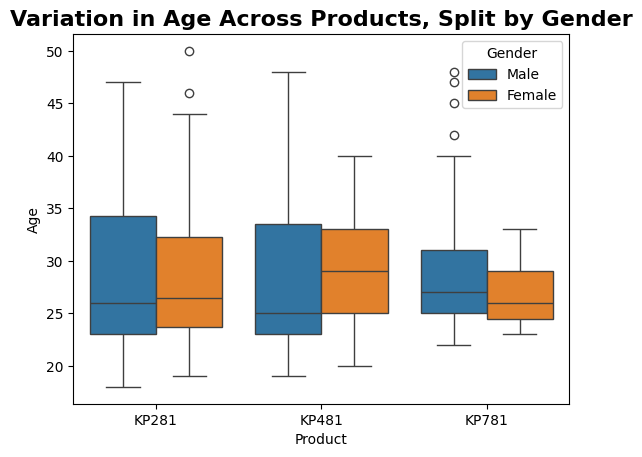

In [ ]:
#Box plot on age vs Product : Outlier Detection
plt.title("Variation in Age Across Products, Split by Gender", fontsize=16, fontweight='bold')
sns.boxplot(df_aerofit,x='Product',y='Age',hue='Gender')

In [ ]:
kp_281_box=df_aerofit.loc[(df_aerofit['Product']=='KP281')&(df_aerofit['Gender']=='Female')]
kp_481_box=df_aerofit.loc[(df_aerofit['Product']=='KP481')&(df_aerofit['Gender']=='Male')]
kp_781_box=df_aerofit.loc[(df_aerofit['Product']=='KP781')&(df_aerofit['Gender']=='Male')]

In [ ]:
kp_281_box.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.00000,40.0000,40.000000,40.000000,40.000000
mean,28.450000,15.10000,2.9000,2.875000,46020.075000,76.200000
std,7.110664,1.08131,0.7779,0.647975,9226.214704,27.988276
min,19.000000,14.00000,2.0000,2.000000,30699.000000,38.000000
25%,23.750000,14.00000,2.0000,2.750000,37521.000000,56.000000
50%,26.500000,15.50000,3.0000,3.000000,46048.500000,75.000000
75%,32.250000,16.00000,3.0000,3.000000,52302.000000,87.250000
max,50.000000,18.00000,5.0000,5.000000,67083.000000,188.000000


In [ ]:
kp_781_box.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,29.545455,17.212121,4.727273,4.636364,75825.030303,164.121212
std,7.462786,1.634732,0.977008,0.652791,18675.002521,60.014455
min,22.000000,14.000000,3.000000,3.000000,48556.000000,80.000000
25%,25.000000,16.000000,4.000000,4.000000,58516.000000,120.000000
50%,27.000000,18.000000,4.000000,5.000000,77191.000000,160.000000
75%,31.000000,18.000000,5.000000,5.000000,90886.000000,180.000000
max,48.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<Axes: title={'center': 'Outlier boxplot for prodcut KP281'}, xlabel='Product', ylabel='Age'>

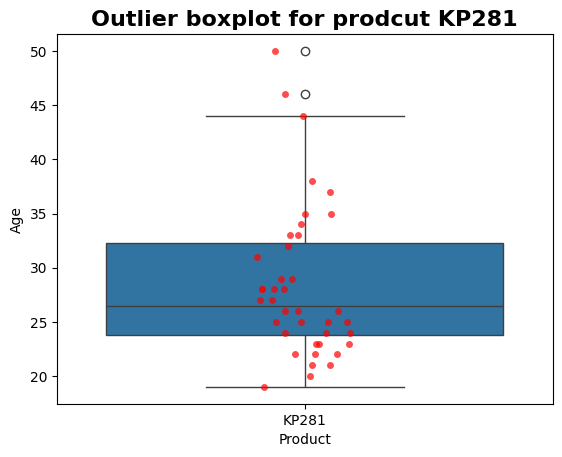

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
plt.title("Outlier boxplot for prodcut KP281", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_281_box,x='Product',y='Age')
sns.stripplot(data=kp_281_box, x='Product', y='Age',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
Q1_a=np.percentile(kp_281_box['Age'],25)
Q1_a

np.float64(23.75)

In [ ]:
Q3_a=np.percentile(kp_281_box['Age'],75)
Q3_a

np.float64(32.25)

In [ ]:
Iqr_age=Q3_a-Q1_a
print('IQR (Age):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age ,',','lower limit:',lower_limit_age)

IQR (Age): 1.0
upper limit: 19.5 , lower limit: 15.5


In [ ]:
#ouliers: both female genders, age>45 prodcut=kp_281 (table format outliers detected):

kp_281_box_preview=kp_281_box.loc[kp_281_box['Age']>upper_limit_age]
kp_281_box_preview

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
77,KP281,46,Female,16,Partnered,3,2,60261,47
79,KP281,50,Female,16,Partnered,3,3,64809,66


<Axes: title={'center': 'Outlier boxplot for prodcut KP781'}, xlabel='Product', ylabel='Age'>

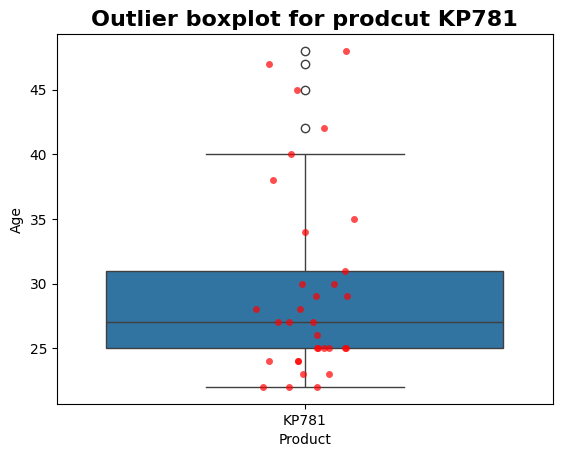

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
plt.title("Outlier boxplot for prodcut KP781", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_781_box,x='Product',y='Age')
sns.stripplot(data=kp_781_box, x='Product', y='Age',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
Q1_a=np.percentile(kp_781_box['Age'],25)
Q1_a

np.float64(25.0)

In [ ]:
Q3_a=np.percentile(kp_781_box['Age'],75)
Q3_a

np.float64(31.0)

In [ ]:
Iqr_age=Q3_a-Q1_a
print('IQR (Age):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age ,',','lower limit:',lower_limit_age)

IQR (Age): 6.0
upper limit: 40.0 , lower limit: 16.0


In [ ]:
#ouliers: all male genders, age>40 prodcut=kp_781: (table format, outliers detected):

kp_781_box_preview=kp_781_box.loc[kp_781_box['Age']>upper_limit_age]
kp_781_box_preview

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


<Axes: title={'center': 'Variation in Usage Across Products, Split by Gender'}, xlabel='Product', ylabel='Usage'>

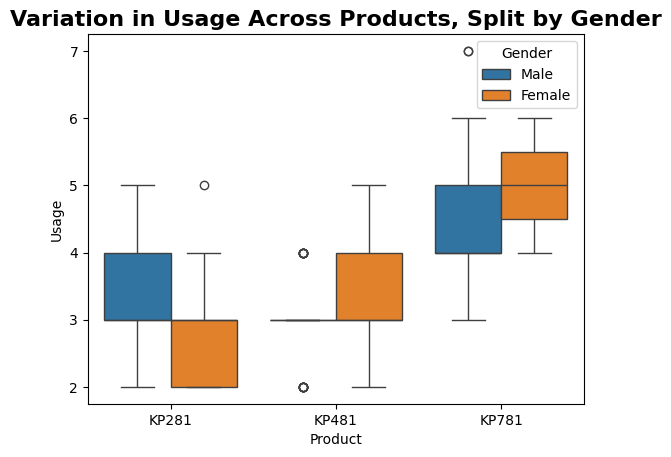

In [ ]:
#Box plot on Usage vs Product : Outlier Detection
plt.title("Variation in Usage Across Products, Split by Gender", fontsize=16, fontweight='bold')
sns.boxplot(df_aerofit,x='Product',y='Usage',hue='Gender')

In [ ]:
kp_281_box=df_aerofit.loc[(df_aerofit['Product']=='KP281')&(df_aerofit['Gender']=='Female')]
kp_481_box=df_aerofit.loc[(df_aerofit['Product']=='KP481')&(df_aerofit['Gender']=='Male')]
kp_781_box=df_aerofit.loc[(df_aerofit['Product']=='KP781')&(df_aerofit['Gender']=='Male')]

<Axes: title={'center': 'Outlier boxplot for prodcut KP281'}, xlabel='Product', ylabel='Usage'>

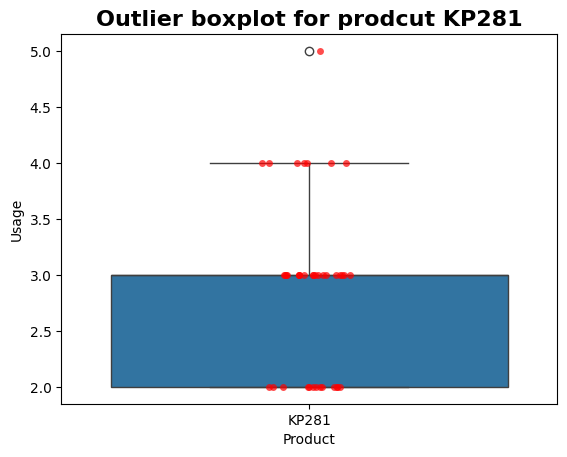

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
plt.title("Outlier boxplot for prodcut KP281", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_281_box,x='Product',y='Usage')
sns.stripplot(data=kp_281_box, x='Product', y='Usage',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
#table format, outliers detected:
Q1_a=np.percentile(kp_281_box['Usage'],25)
Q3_a=np.percentile(kp_281_box['Usage'],75)
Iqr_age=Q3_a-Q1_a
print('IQR (Usage):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age)
kp_281_box_preview=kp_281_box.loc[kp_281_box['Usage']>upper_limit_age]
kp_281_box_preview

IQR (Usage): 1.0
upper limit: 4.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
23,KP281,24,Female,16,Partnered,5,5,44343,188


<Axes: title={'center': 'Outlier boxplot for prodcut KP481'}, xlabel='Product', ylabel='Usage'>

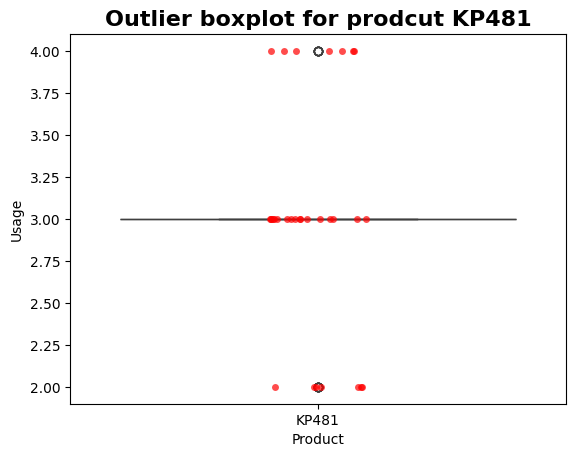

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
plt.title("Outlier boxplot for prodcut KP481", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_481_box,x='Product',y='Usage')
sns.stripplot(data=kp_481_box, x='Product', y='Usage',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
#table format, outliers detected:
Q1_a=np.percentile(kp_481_box['Usage'],25)
Q3_a=np.percentile(kp_481_box['Usage'],75)
Iqr_age=Q3_a-Q1_a
print('IQR (Usage):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age,'lower limit:',lower_limit_age)
kp_481_box_preview=kp_481_box.loc[kp_481_box['Usage']>upper_limit_age]
kp_481_box_preview

IQR (Usage): 0.0
upper limit: 3.0 lower limit: 3.0


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
90,KP481,23,Male,16,Partnered,4,3,45480,127
103,KP481,25,Male,14,Partnered,4,3,45480,170
107,KP481,25,Male,14,Single,4,3,48891,127
110,KP481,26,Male,16,Single,4,3,51165,106
111,KP481,27,Male,14,Single,4,2,45480,53
118,KP481,32,Male,16,Single,4,3,60261,127
120,KP481,33,Male,13,Partnered,4,4,53439,170


In [ ]:
#table format, outliers detected:
kp_281_box_preview1=kp_481_box.loc[kp_481_box['Usage']<lower_limit_age]
kp_281_box_preview1

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
81,KP481,20,Male,14,Single,2,3,32973,53
85,KP481,21,Male,16,Partnered,2,2,34110,42
86,KP481,21,Male,12,Partnered,2,2,32973,53
99,KP481,25,Male,16,Partnered,2,2,52302,42
105,KP481,25,Male,16,Partnered,2,3,50028,53
138,KP481,45,Male,16,Partnered,2,2,54576,42
139,KP481,48,Male,16,Partnered,2,3,57987,64


<Axes: title={'center': 'Outlier boxplot for prodcut KP781'}, xlabel='Product', ylabel='Usage'>

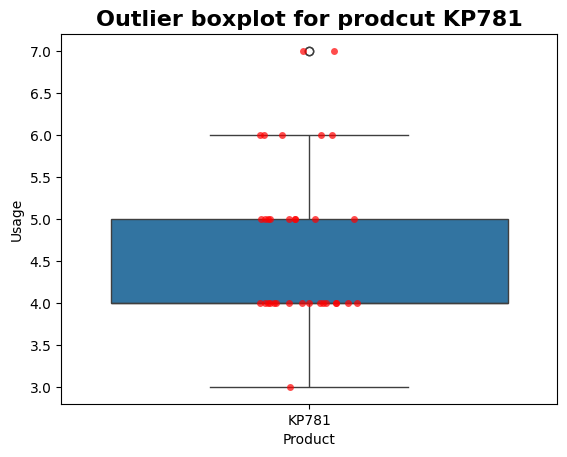

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
plt.title("Outlier boxplot for prodcut KP781", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_781_box,x='Product',y='Usage')
sns.stripplot(data=kp_781_box, x='Product', y='Usage',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
#table format, outliers detected:
Q1_a=np.percentile(kp_781_box['Usage'],25)
Q3_a=np.percentile(kp_781_box['Usage'],75)
Iqr_age=Q3_a-Q1_a
print('IQR (Usage):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age)
kp_781_box_preview=kp_781_box.loc[kp_781_box['Usage']>upper_limit_age]
kp_781_box_preview

IQR (Usage): 1.0
upper limit: 6.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
163,KP781,28,Male,18,Partnered,7,5,77191,180
166,KP781,29,Male,14,Partnered,7,5,85906,300


<Axes: title={'center': 'Variation in Education Across Products, Split by Gender'}, xlabel='Product', ylabel='Education'>

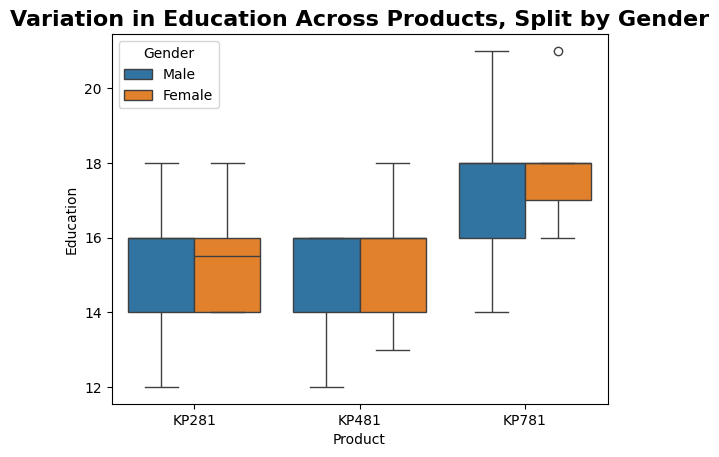

In [ ]:
#Box plot on Education vs Product : Outlier Detection
plt.title("Variation in Education Across Products, Split by Gender", fontsize=16, fontweight='bold')
sns.boxplot(df_aerofit,x='Product',y='Education',hue='Gender')

<Axes: title={'center': 'Outlier boxplot for prodcut KP781'}, xlabel='Product', ylabel='Education'>

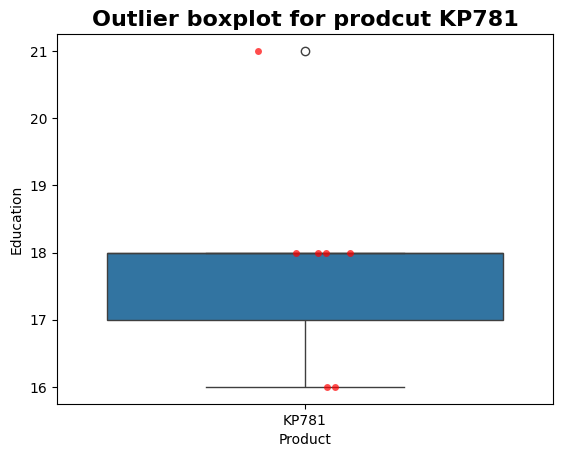

In [ ]:
#boxplot for a specific product from previous boxplot to highlight the outlier and the necessary calculations:
kp_781_boxf=df_aerofit.loc[(df_aerofit['Product']=='KP781')&(df_aerofit['Gender']=='Female')]
plt.title("Outlier boxplot for prodcut KP781", fontsize=16, fontweight='bold')
sns.boxplot(data=kp_781_boxf,x='Product',y='Education')
sns.stripplot(data=kp_781_boxf, x='Product', y='Education',dodge=True, jitter=True, marker='o', color='red', alpha=0.7)

In [ ]:
#table format, outliers detected:
Q1_a=np.percentile(kp_781_boxf['Education'],25)
Q3_a=np.percentile(kp_781_boxf['Education'],75)
Iqr_age=Q3_a-Q1_a
print('IQR (Education):',Iqr_age)
upper_limit_age=Q3_a+1.5*Iqr_age
lower_limit_age=Q1_a-1.5*Iqr_age
print('upper limit:',upper_limit_age)
kp_781_box_preview=kp_781_boxf.loc[kp_781_boxf['Education']>upper_limit_age]
kp_781_box_preview

IQR (Education): 1.0
upper limit: 19.5


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
157,KP781,26,Female,21,Single,4,3,69721,100


In [ ]:
##Conversion##### for contingency tables
def income_range(x):
  if (x['Income']>=29562 and x['Income']<=54568.3):
    x['Income_range']="Low"
    return x
  elif(x['Income']>54568.3 and x['Income']<=75019):
    x['Income_range']="Medium"
    return x
  else:
    x['Income_range']="High"
    return x
temp=df_aerofit.apply(income_range,axis=1)
temp.head()


bins = [0, 20, 35,float("inf")]
labels = ["Young", "Teenagers", "Middle-aged"]
temp["Age"] = pd.cut(temp["Age"], bins=bins, labels=labels)

bins = [0, 14, 18,float("inf")]
labels = ["Low Education", "Medium Education", "High Education"]
temp["Education"] = pd.cut(temp["Education"], bins=bins, labels=labels)


bins = [0, 3, 5,float("inf")]
labels = ["Low Usage", "Medium Usage", "High Usgae"]
temp["Usage"] = pd.cut(temp["Usage"], bins=bins, labels=labels)



bins = [20, 100, 250,float("inf")]
labels = ["Low Miles", "Medium Miles", "High Miles"]
temp["Miles"] = pd.cut(temp["Miles"], bins=bins, labels=labels)


bins = [0, 2, 4,float("inf")]
labels = ["Poor Shape", "Fair Shape", "Excellent Shape"]
temp["Fitness"] = pd.cut(temp["Fitness"], bins=bins, labels=labels)


In [ ]:
temp.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_range
0,KP281,Young,Male,Low Education,Single,Low Usage,Fair Shape,29562,Medium Miles,Low
1,KP281,Young,Male,Medium Education,Single,Low Usage,Fair Shape,31836,Low Miles,Low
2,KP281,Young,Female,Low Education,Partnered,Medium Usage,Fair Shape,30699,Low Miles,Low
3,KP281,Young,Male,Low Education,Single,Low Usage,Fair Shape,32973,Low Miles,Low
4,KP281,Young,Male,Low Education,Partnered,Medium Usage,Poor Shape,35247,Low Miles,Low


##Contingency tables:

####Marginal Probability:

In [ ]:
#generalised contingency table: On product vs Gender:
"Among all customers, 44.4% purchased KP281."
"Among all customers, 33.3% purchased KP481."
"Among all customers, 22.2% purchased KP781."

"Note: Only the above statements are common for the following tables. The distribution is different."


"Among all Male customers, 18.3% purchased KP781."
"Among all Female customers, 22.2% purchased KP281."
"Among all Male customers, 22.2% purchased KP281."
"Among all Male customers, 17.2% purchased KP481."

pd.crosstab(index=temp["Product"],columns=temp["Gender"],margins=True,normalize=True)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


In [ ]:
#continegncy on Income range (High, medium, low income groups) vs products:
"Among all customers, 65.0% are in the Low-Income range."
"Among all customers, 23.3% are in the Medium-Income range."
"Among all customers, 11.7% are in the High-Income range."
"Among High-Income customers, 10.0% bought KP781 and are Male."
"Among Low-Income customers, 17.8% bought KP281 and are Female."
"Among Low-Income customers, 13.3% bought KP481 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Income_range'],margins=True,normalize=True)*100

Income_range         High        Low     Medium         All
Product Gender                                             
KP281   Female   0.000000  17.777778   4.444444   22.222222
        Male     0.000000  16.666667   5.555556   22.222222
KP481   Female   0.000000  12.777778   3.333333   16.111111
        Male     0.000000  13.333333   3.888889   17.222222
KP781   Female   1.666667   1.111111   1.111111    3.888889
        Male    10.000000   3.333333   5.000000   18.333333
All             11.666667  65.000000  23.333333  100.000000

In [ ]:
#Contingency table### Marginal Probability###
"Among all customers, 59.4% are Partnered."
"Among all customers, 40.0% are Single."
"Among Partnered customers, 15.0% bought KP281 and are Female."
"Among Partnered customers, 11.7% bought KP481 and are Male."
"Among Single customers, 10.6% bought KP281 and are Male."
"Among Partnered customers, 10.5% bought KP781 and are Male."

pd.crosstab(index=[df_aerofit["Product"], df_aerofit["Gender"]],columns=df_aerofit["MaritalStatus"],margins=True,normalize=True)*100

MaritalStatus   Partnered     Single         All
Product Gender                                  
KP281   Female  15.000000   7.222222   22.222222
        Male    11.666667  10.555556   22.222222
KP481   Female   8.333333   7.777778   16.111111
        Male    11.666667   5.555556   17.222222
KP781   Female   2.222222   1.666667    3.888889
        Male    10.555556   7.777778   18.333333
All             59.444444  40.555556  100.000000

In [ ]:
#Deeper contingency tables: On Product-Gender vs Age (in categories)
"Among all customers, 78.9% are Teenagers."
"Among all customers, 15.6% are Middle-aged."
"Among all customers, 5.6% are Young."
"Among Teenagers, 18.3% bought KP281 and are Female."
"Among Teenagers, 15.0% bought KP281 and are Male."
"Among Teenagers, 13.3% bought KP481 and are Male."
"Among Teenagers, 13.3% bought KP481 and are Female."
"Among Teenagers, 15.0% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Age'],margins=True,normalize=True)*100

Age                Young  Teenagers  Middle-aged         All
Product Gender                                              
KP281   Female  1.111111  18.333333     2.777778   22.222222
        Male    2.222222  15.000000     5.000000   22.222222
KP481   Female  0.555556  13.333333     2.222222   16.111111
        Male    1.666667  13.333333     2.222222   17.222222
KP781   Female  0.000000   3.888889     0.000000    3.888889
        Male    0.000000  15.000000     3.333333   18.333333
All             5.555556  78.888889    15.555556  100.000000

In [ ]:
#Deeper contingency tables:On Product-Gender vs Education (in categories)
"Among all customers, 35.0% have Low Education."
"Among all customers, 62.8% have Medium Education."
"Among all customers, 2.2% have High Education."
"Among Medium Education customers, 12.2% bought KP281 and are Female."
"Among Medium Education customers, 12.7% bought KP281 and are Male."
"Among Medium Education customers, 8.8% bought KP481 and are Female."
"Among Medium Education customers, 10.0% bought KP481 and are Male."
"Among Medium Education customers, 15.6% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Education'],margins=True,normalize=True)*100

Education       Low Education  Medium Education  High Education         All
Product Gender                                                             
KP281   Female      10.000000         12.222222        0.000000   22.222222
        Male         9.444444         12.777778        0.000000   22.222222
KP481   Female       7.222222          8.888889        0.000000   16.111111
        Male         7.222222         10.000000        0.000000   17.222222
KP781   Female       0.000000          3.333333        0.555556    3.888889
        Male         1.111111         15.555556        1.666667   18.333333
All                 35.000000         62.777778        2.222222  100.000000

In [ ]:
#Deeper contingency tables: On Product-Gender vs Usage(in categories)
"Among all customers, 56.7% are Low Usage users."
"Among all customers, 38.3% are Medium Usage users."
"Among all customers, 5.0% are High Usage users."
"Among Low Usage customers, 17.8% bought KP281 and are Female."
"Among Low Usage customers, 13.3% bought KP281 and are Male."
"Among Low Usage customers, 13.3% bought KP481 and are Male."
"Among Low Usage customers, 11.7% bought KP481 and are Female."
"Among Medium Usage customers, 13.9% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Usage'],margins=True,normalize=True)*100

Usage           Low Usage  Medium Usage  High Usgae         All
Product Gender                                                 
KP281   Female  17.777778      4.444444    0.000000   22.222222
        Male    13.333333      8.888889    0.000000   22.222222
KP481   Female  11.666667      4.444444    0.000000   16.111111
        Male    13.333333      3.888889    0.000000   17.222222
KP781   Female   0.000000      2.777778    1.111111    3.888889
        Male     0.555556     13.888889    3.888889   18.333333
All             56.666667     38.333333    5.000000  100.000000

In [ ]:
#Deeper contingency tables:On Product-Gender vs miles (in categories)
"Among all customers, 63.3% are Low Miles users."
"Among all customers, 34.4% are Medium Miles users."
"Among all customers, 2.2% are High Miles users."
"Among Low Miles customers, 18.9% bought KP281 and are Female."
"Among Low Miles customers, 15.6% bought KP281 and are Male."
"Among Low Miles customers, 12.2% bought KP481 and are Female."
"Among Low Miles customers, 12.2% bought KP481 and are Male."
"Among Medium Miles customers, 13.3% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Miles'],margins=True,normalize=True)*100

Miles           Low Miles  Medium Miles  High Miles         All
Product Gender                                                 
KP281   Female  18.888889      3.333333    0.000000   22.222222
        Male    15.555556      6.666667    0.000000   22.222222
KP481   Female  12.222222      3.888889    0.000000   16.111111
        Male    12.222222      5.000000    0.000000   17.222222
KP781   Female   1.111111      2.222222    0.555556    3.888889
        Male     3.333333     13.333333    1.666667   18.333333
All             63.333333     34.444444    2.222222  100.000000

In [ ]:
#Deeper contingency tables: On Product-Gender vs Fitness (in categories)
"Among all customers, 67.2% are in Fair Shape."
"Among all customers, 15.6% are in Poor Shape."
"Among all customers, 17.2% are in Excellent Shape."
"Among Fair Shape customers, 18.9% bought KP281 and are Male."
"Among Fair Shape customers, 16.1% bought KP281 and are Female."
"Among Fair Shape customers, 13.9% bought KP481 and are Male."
"Among Fair Shape customers, 12.2% bought KP481 and are Female."
"Among Excellent Shape customers, 13.3% bought KP781 and are Male"

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Fitness'],margins=True,normalize=True)*100

Fitness         Poor Shape  Fair Shape  Excellent Shape         All
Product Gender                                                     
KP281   Female    5.555556   16.111111         0.555556   22.222222
        Male      2.777778   18.888889         0.555556   22.222222
KP481   Female    3.888889   12.222222         0.000000   16.111111
        Male      3.333333   13.888889         0.000000   17.222222
KP781   Female    0.000000    1.111111         2.777778    3.888889
        Male      0.000000    5.000000        13.333333   18.333333
All              15.555556   67.222222        17.222222  100.000000

####Conditional Probability

In [ ]:
#P(Gender|Product)
"Among customers who purchased KP281, 50.0% are Female and 50.0% are Male."
"Among customers who purchased KP481, 48.3% are Female and 51.7% are Male."
"Among customers who purchased KP781, 82.5% are Male."

pd.crosstab(index=temp["Product"],columns=temp["Gender"],normalize='index')*100

Gender,Female,Male
Product,,
KP281,50.000000,50.000000
KP481,48.333333,51.666667
KP781,17.500000,82.500000


In [ ]:
#P(Product|Gender)
"Among Female customers, 52.6% purchased KP281."
"Among Male customers, 38.5% purchased KP281."
"Among Female customers, 38.2% purchased KP481."
"Among Male customers, 29.8% purchased KP481."
"Among Female customers, only 9.2% purchased KP781."
"Among Male customers, 31.7% purchased KP781."

pd.crosstab(index=temp["Product"],columns=temp["Gender"],normalize='columns')*100

Gender,Female,Male
Product,,
KP281,52.631579,38.461538
KP481,38.157895,29.807692
KP781,9.210526,31.730769


In [ ]:
#P(Income_range|Product,Gender)
"Among Female customers who purchased KP281, 80.0% are in the Low-Income range."
"Among Male customers who purchased KP281, 75.0% are in the Low-Income range."
"Among Female customers who purchased KP481, 79.3% are in the Low-Income range."
"Among Male customers who purchased KP481, 77.4% are in the Low-Income range."
"Among Female customers who purchased KP781, 42.9% are in the High-Income range."
"Among Male customers who purchased KP781, 54.5% are in the High-Income range."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Income_range'],normalize='index')*100

Income_range         High        Low     Medium
Product Gender                                 
KP281   Female   0.000000  80.000000  20.000000
        Male     0.000000  75.000000  25.000000
KP481   Female   0.000000  79.310345  20.689655
        Male     0.000000  77.419355  22.580645
KP781   Female  42.857143  28.571429  28.571429
        Male    54.545455  18.181818  27.272727

In [ ]:
#P(Product,Gender|Income_range)
"Among High-Income customers, 85.7% bought KP781 and are Male."
"Among Low-Income customers, 27.4% bought KP281 and are Female."
"Among Medium-Income customers, 23.8% bought KP281 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Income_range'],normalize='columns')*100

Income_range         High        Low     Medium
Product Gender                                 
KP281   Female   0.000000  27.350427  19.047619
        Male     0.000000  25.641026  23.809524
KP481   Female   0.000000  19.658120  14.285714
        Male     0.000000  20.512821  16.666667
KP781   Female  14.285714   1.709402   4.761905
        Male    85.714286   5.128205  21.428571

In [ ]:
#P(MaritalStatus|Product,Gender)
"Among all customers who bought KP281 and are Female, 67.5% are Partnered."
"Among all customers who bought KP281 and are Male, 52.5% are Partnered."
"Among all customers who bought KP481 and are Female, 51.7% are Partnered."
"Among all customers who bought KP481 and are Male, 67.7% are Partnered."
"Among all customers who bought KP781 and are Female, 57.1% are Partnered."
"Among all customers who bought KP781 and are Male, 57.5% are Partnered."

pd.crosstab(index=[df_aerofit["Product"], df_aerofit["Gender"]],columns=df_aerofit["MaritalStatus"],normalize='index')*100

MaritalStatus   Partnered     Single
Product Gender                      
KP281   Female  67.500000  32.500000
        Male    52.500000  47.500000
KP481   Female  51.724138  48.275862
        Male    67.741935  32.258065
KP781   Female  57.142857  42.857143
        Male    57.575758  42.424242

In [ ]:
#P(Product,Gender|MaritalStatus)
"Among Single (Marital status),26% bought KP281 and are Male"
"Among Partnered (Marital status),25% bought KP281 and are Female"
"Among Single (Marital status),19.1% bought KP481 and are Female"
"Among Partnered (Marital status),19.6% bought KP481 and are Male"
"Among Partnered (Marital status),17.7% bought KP781 and are Male"
"Among Single (Marital status),19.1% bought KP781 and are Male"

pd.crosstab(index=[df_aerofit["Product"], df_aerofit["Gender"]],columns=df_aerofit["MaritalStatus"],normalize='columns')*100

MaritalStatus   Partnered     Single
Product Gender                      
KP281   Female  25.233645  17.808219
        Male    19.626168  26.027397
KP481   Female  14.018692  19.178082
        Male    19.626168  13.698630
KP781   Female   3.738318   4.109589
        Male    17.757009  19.178082

In [ ]:
#P(Age|Product,Gender):
"Among all customers who bought KP281 and are Female, 82.5% are Teenagers."
"Among all customers who bought KP281 and are Male, 67.5% are Teenagers."
"Among all customers who bought KP481 and are Female, 82.7% are Teenagers."
"Among all customers who bought KP481 and are Male, 77.4% are Teenagers."
"Among all customers who bought KP781 and are Female, 100% are Teenagers."
"Among all customers who bought KP781 and are Male, 81.8% are Teenagers."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Age'],normalize='index') * 100

Age                 Young   Teenagers  Middle-aged
Product Gender                                    
KP281   Female   5.000000   82.500000    12.500000
        Male    10.000000   67.500000    22.500000
KP481   Female   3.448276   82.758621    13.793103
        Male     9.677419   77.419355    12.903226
KP781   Female   0.000000  100.000000     0.000000
        Male     0.000000   81.818182    18.181818

In [ ]:
#P(Product,Gender|Age):
"Among all Teenagers, 23% bought KP281 and are Female."
"Among all Young-aged group, 40% bought KP281 and are Male."
"Among all Middle-aged group, 32% bought KP281 and are Male."
"Among all Young-aged group, 30% bought KP481 and are Male."
"Among all Middle-aged group, 21.4% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Age'],normalize='columns') * 100



#Just because all Female KP781 buyers are Teenagers doesn’t mean Teenagers overwhelmingly choose KP781.
#Teenagers may prefer other products, making KP781 a niche choice.

Age             Young  Teenagers  Middle-aged
Product Gender                               
KP281   Female   20.0  23.239437    17.857143
        Male     40.0  19.014085    32.142857
KP481   Female   10.0  16.901408    14.285714
        Male     30.0  16.901408    14.285714
KP781   Female    0.0   4.929577     0.000000
        Male      0.0  19.014085    21.428571

In [ ]:
#P(Education|Product,Gender)
"Among Female who purcahed KP281, 55% are with Medium Education"
"Among Male who purcahed KP281, 57% are with Medium Education"
"Among Female who purcahed KP481, 55% are with Medium Education"
"Among Male who purcahed KP481, 58% are with Medium Education"
"Among Female who purcahed KP781, 85% are with Medium Education"
"Among Male who purcahed KP781, 84.8% are with Medium Education"

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Education'],normalize='index')*100

Education       Low Education  Medium Education  High Education
Product Gender                                                 
KP281   Female      45.000000         55.000000        0.000000
        Male        42.500000         57.500000        0.000000
KP481   Female      44.827586         55.172414        0.000000
        Male        41.935484         58.064516        0.000000
KP781   Female       0.000000         85.714286       14.285714
        Male         6.060606         84.848485        9.090909

In [ ]:
#P(Product,Gender|Education)
"Among customers with High Education, 75.0% bought KP781 and are Male."
"Among customers with Medium Education, 24.8% bought KP781 and are Male."
"Among customers with Low Education, 28.6% bought KP281 and are Female."
"Among customers with Low Education, 27.0% bought KP281 and are Male."
"Among customers with Low Education, 20.6% bought KP481 and are Male and Female."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Education'],normalize='columns')*100

Education       Low Education  Medium Education  High Education
Product Gender                                                 
KP281   Female      28.571429         19.469027             0.0
        Male        26.984127         20.353982             0.0
KP481   Female      20.634921         14.159292             0.0
        Male        20.634921         15.929204             0.0
KP781   Female       0.000000          5.309735            25.0
        Male         3.174603         24.778761            75.0

In [ ]:
#P(Usage|Product,Gender)
"Among Female customers who purchased KP281, 80.0% are Low Usage."
"Among Male customers who purchased KP281, 60.0% are Low Usage."
"Among Male customers who purchased KP281, 40.0% are Medium Usage."

"Among Female customers who purchased KP481, 72.4% are Low Usage."
"Among Male customers who purchased KP481, 77.4% are Low Usage."

"Among Male customers who purchased KP781, 75.8% are Medium Usage."
"Among Female customers who purchased KP781, 71.4% are Medium Usage."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Usage'],normalize='index')*100

Usage           Low Usage  Medium Usage  High Usgae
Product Gender                                     
KP281   Female  80.000000     20.000000    0.000000
        Male    60.000000     40.000000    0.000000
KP481   Female  72.413793     27.586207    0.000000
        Male    77.419355     22.580645    0.000000
KP781   Female   0.000000     71.428571   28.571429
        Male     3.030303     75.757576   21.212121

In [ ]:
#P(Product,Gender|Usage)
"Among High Usage customers, 77.8% bought KP781 and are Male."
"Among Low Usage customers, 31.4% bought KP281 and are Female."
"Among Medium Usage customers, 36.2% bought KP781 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Usage'],normalize='columns')*100

Usage           Low Usage  Medium Usage  High Usgae
Product Gender                                     
KP281   Female  31.372549     11.594203    0.000000
        Male    23.529412     23.188406    0.000000
KP481   Female  20.588235     11.594203    0.000000
        Male    23.529412     10.144928    0.000000
KP781   Female   0.000000      7.246377   22.222222
        Male     0.980392     36.231884   77.777778

In [ ]:
#P(Miles|Product,Gender)
"Among Female customers who purchased KP281, 85.0% are Low Miles users."
"Among Male customers who purchased KP281, 70.0% are Low Miles users."
"Among Female customers who purchased KP481, 75.8% are Low Miles users."
"Among Male customers who purchased KP481, 70.9% are Low Miles users."
"Among Female customers who purchased KP781, 57.1% are Medium Miles users."
"Among Male customers who purchased KP781, 72.7% are Medium Miles users."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Miles'],normalize='index')*100

Miles           Low Miles  Medium Miles  High Miles
Product Gender                                     
KP281   Female  85.000000     15.000000    0.000000
        Male    70.000000     30.000000    0.000000
KP481   Female  75.862069     24.137931    0.000000
        Male    70.967742     29.032258    0.000000
KP781   Female  28.571429     57.142857   14.285714
        Male    18.181818     72.727273    9.090909

In [ ]:
#P(Product,Gender|Miles)
"Among High Miles users, 75.0% bought KP781 and are Male."
"Among Medium Miles users, 38.7% bought KP781 and are Male."
"Among Low Miles users, 29.8% bought KP281 and are Female."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Miles'],normalize='columns')*100

Miles           Low Miles  Medium Miles  High Miles
Product Gender                                     
KP281   Female  29.824561      9.677419         0.0
        Male    24.561404     19.354839         0.0
KP481   Female  19.298246     11.290323         0.0
        Male    19.298246     14.516129         0.0
KP781   Female   1.754386      6.451613        25.0
        Male     5.263158     38.709677        75.0

In [ ]:
#P(Fitness|Product,Gender)
"Among Female customers who purchased KP281, 72.5% are in Fair Shape."
"Among Male customers who purchased KP281, 85.0% are in Fair Shape."
"Among Female customers who purchased KP481, 75.8 are in Fair Shape."
"Among Male customers who purchased KP481, 80.6% are in Fair Shape."
"Among Female customers who purchased KP781, 71.4% are in Excellent Shape."
"Among Male customers who purchased KP781, 72.7% are in Excellent Shape."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Fitness'],normalize='index')*100

Fitness         Poor Shape  Fair Shape  Excellent Shape
Product Gender                                         
KP281   Female   25.000000   72.500000         2.500000
        Male     12.500000   85.000000         2.500000
KP481   Female   24.137931   75.862069         0.000000
        Male     19.354839   80.645161         0.000000
KP781   Female    0.000000   28.571429        71.428571
        Male      0.000000   27.272727        72.727273

In [ ]:
#P(Product,Gender|Fitness)
"Among Excellent Shape customers, 77.4% bought KP781 and are Male."
"Among Poor Shape customers, 35.7% bought KP281 and are Female."
"Among Fair Shape customers, 28.1% bought KP281 and are Male."

pd.crosstab(index=[temp["Product"], temp["Gender"]],columns=temp['Fitness'],normalize='columns')*100

Fitness         Poor Shape  Fair Shape  Excellent Shape
Product Gender                                         
KP281   Female   35.714286   23.966942         3.225806
        Male     17.857143   28.099174         3.225806
KP481   Female   25.000000   18.181818         0.000000
        Male     21.428571   20.661157         0.000000
KP781   Female    0.000000    1.652893        16.129032
        Male      0.000000    7.438017        77.419355